# 1. Extract and Load the Datasets


In [4]:
import pandas as pd
import zipfile
import io
import requests

# Download the ZIP file
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip'
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))

# Extract specific files
mat_data = pd.read_csv(zip_file.open('student-mat.csv'), sep=';')
por_data = pd.read_csv(zip_file.open('student-por.csv'), sep=';')

# Display the first few rows of the datasets
print("Math Data:\n", mat_data.head())
print("Portuguese Data:\n", por_data.head())


Math Data:
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Portuguese Data:
   school sex  age address famsize Pstatus  Medu  Fedu     

# 2. Convert Categorical Variables and Compute Correlation Matrix

Summary Statistics:
               age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std   

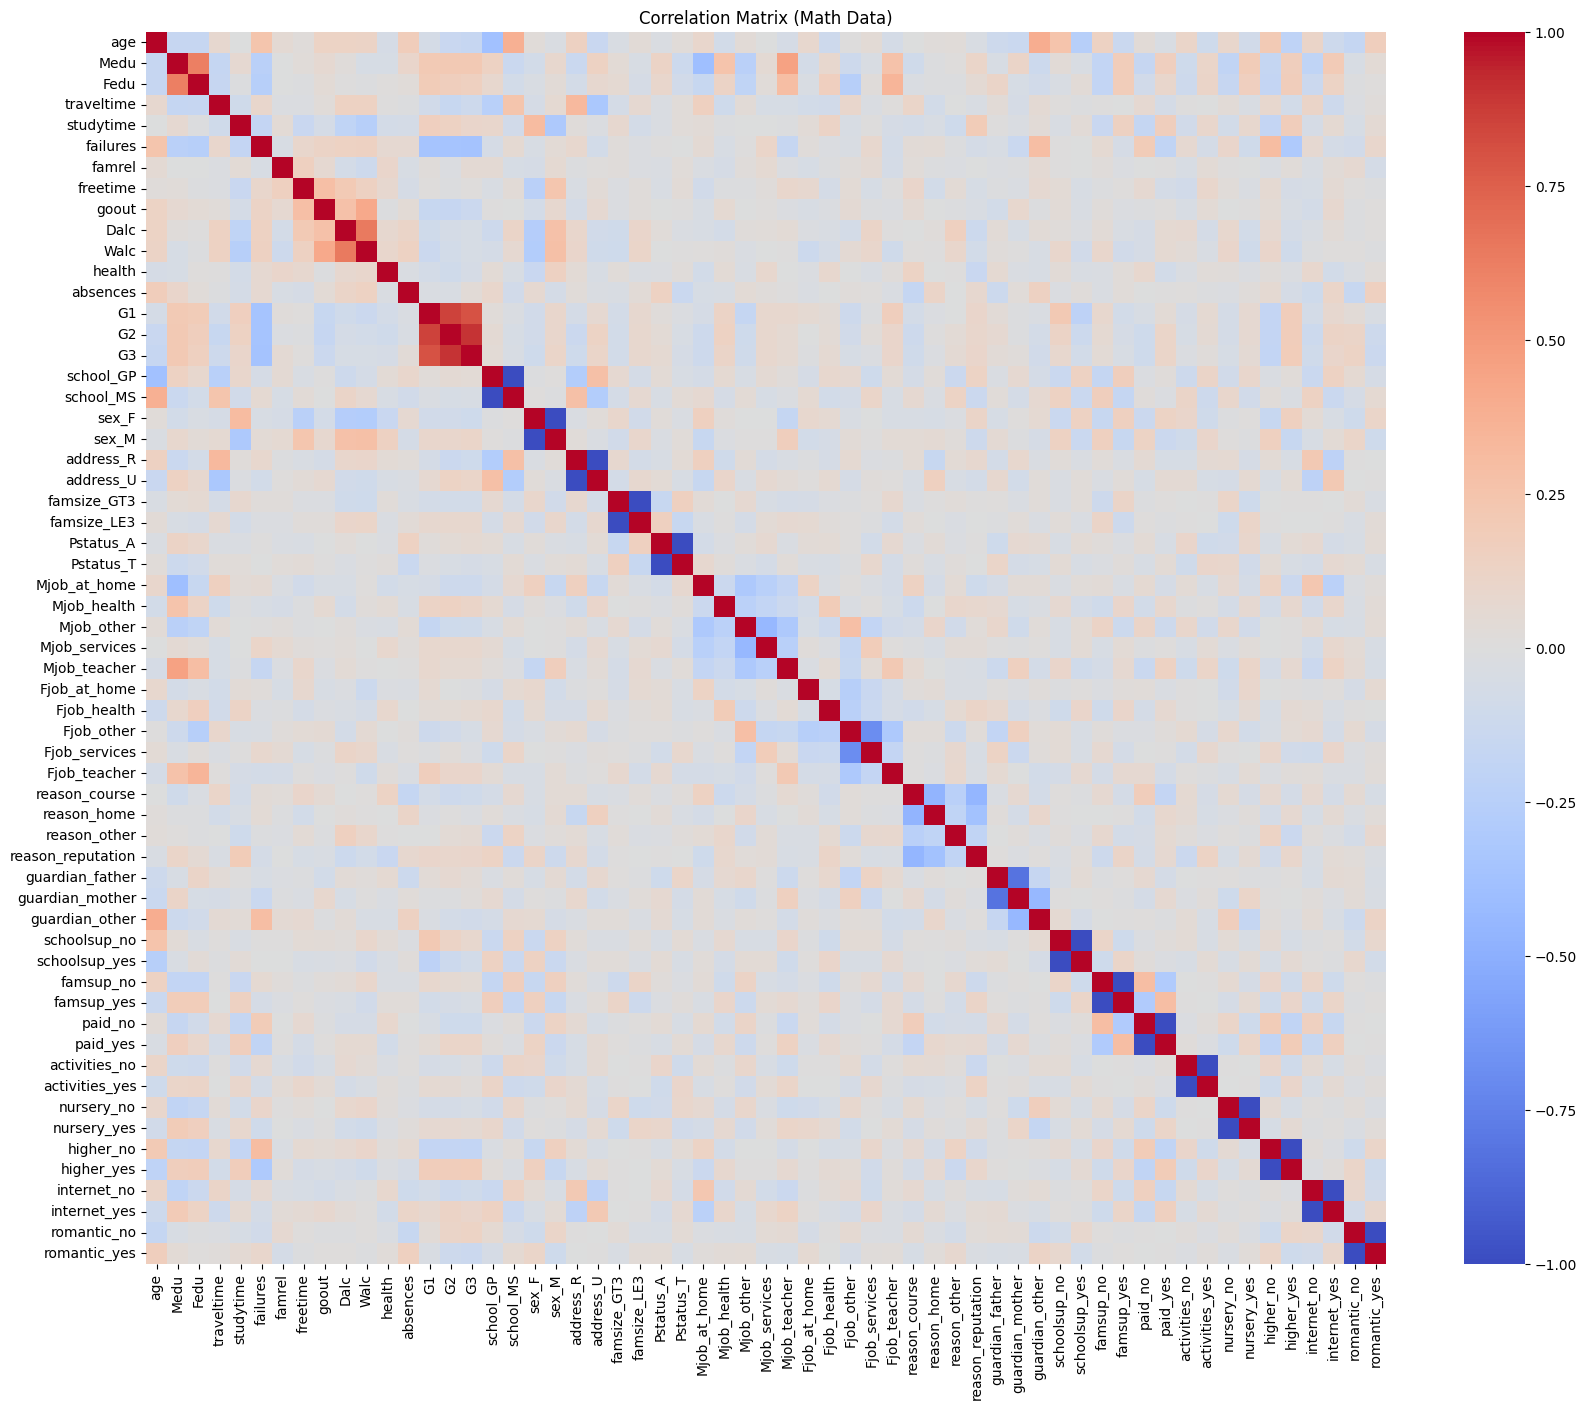

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert categorical variables to numeric using one-hot encoding
mat_data_encoded = pd.get_dummies(mat_data)

# Summary statistics
summary_stats = mat_data_encoded.describe()
print("Summary Statistics:\n", summary_stats)

# Correlation matrix
correlation_matrix = mat_data_encoded.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (Math Data)')
plt.show()


# 3. Visualizing Key Factors


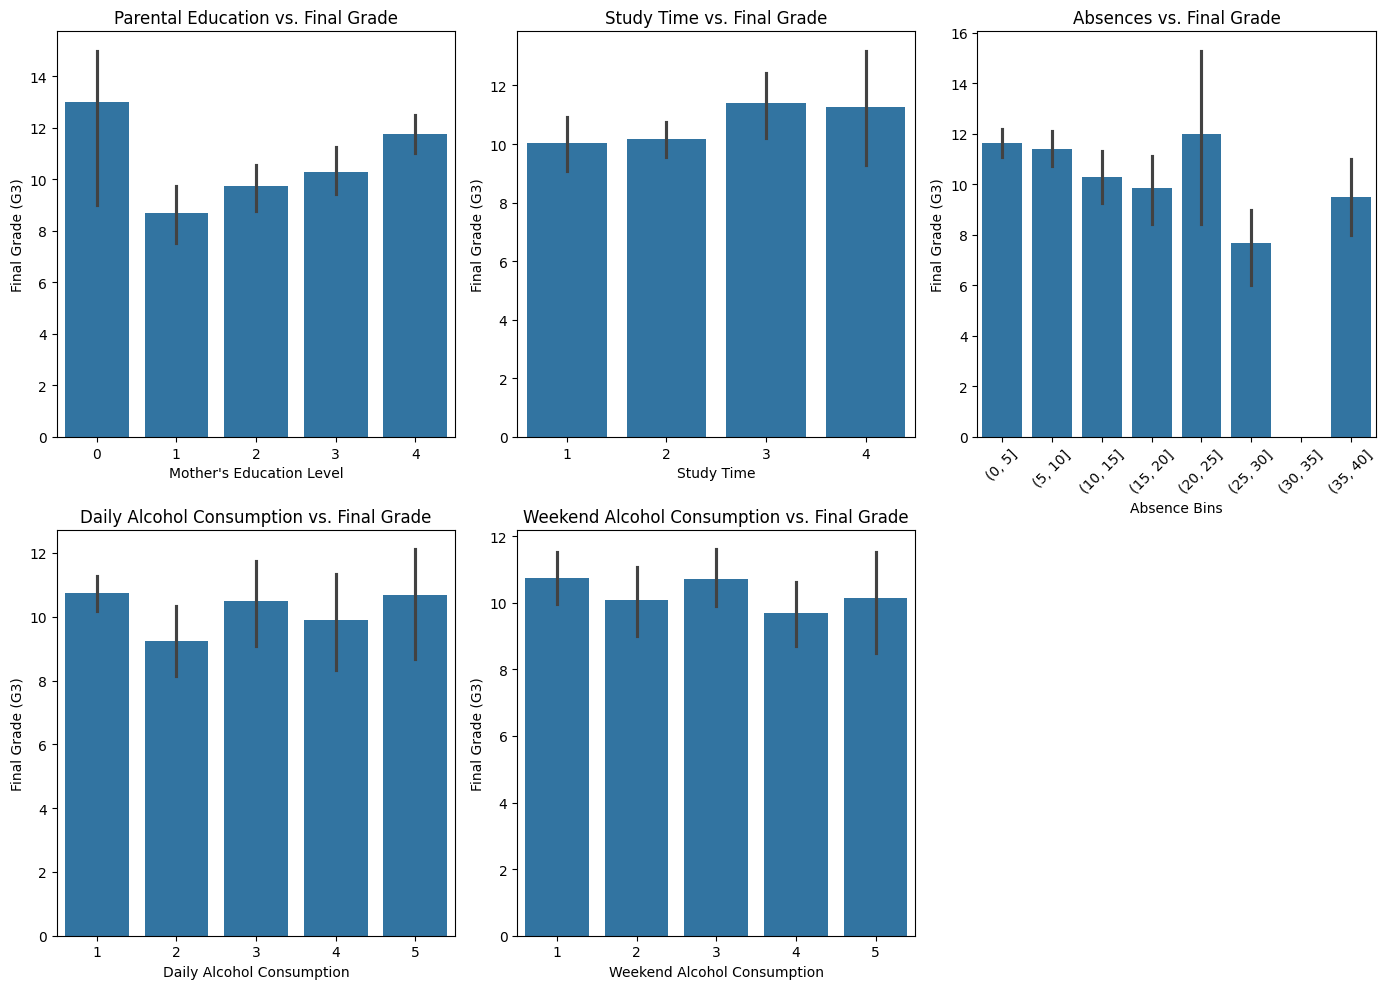

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a combined bar plot
plt.figure(figsize=(14, 10))

# Parental Education vs. Final Grade
plt.subplot(2, 3, 1)
sns.barplot(x='Medu', y='G3', data=mat_data)
plt.title('Parental Education vs. Final Grade')
plt.xlabel("Mother's Education Level")
plt.ylabel('Final Grade (G3)')

# Study Time vs. Final Grade
plt.subplot(2, 3, 2)
sns.barplot(x='studytime', y='G3', data=mat_data)
plt.title('Study Time vs. Final Grade')
plt.xlabel('Study Time')
plt.ylabel('Final Grade (G3)')

# Absences vs. Final Grade
plt.subplot(2, 3, 3)
bins = pd.cut(mat_data['absences'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40])
mat_data['absence_bins'] = bins
sns.barplot(x='absence_bins', y='G3', data=mat_data)
plt.title('Absences vs. Final Grade')
plt.xlabel('Absence Bins')
plt.ylabel('Final Grade (G3)')
plt.xticks(rotation=45)
mat_data.drop(columns=['absence_bins'], inplace=True)

# Daily Alcohol Consumption vs. Final Grade
plt.subplot(2, 3, 4)
sns.barplot(x='Dalc', y='G3', data=mat_data)
plt.title('Daily Alcohol Consumption vs. Final Grade')
plt.xlabel('Daily Alcohol Consumption')
plt.ylabel('Final Grade (G3)')

# Weekend Alcohol Consumption vs. Final Grade
plt.subplot(2, 3, 5)
sns.barplot(x='Walc', y='G3', data=mat_data)
plt.title('Weekend Alcohol Consumption vs. Final Grade')
plt.xlabel('Weekend Alcohol Consumption')
plt.ylabel('Final Grade (G3)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


# 4. Interpretation and Recommendations

In [7]:
# Interpretation of Key Factors
interpretation = """
Key Factors Influencing Student Performance (Math Data):

1. Parental Education:
   - Higher levels of parental education, especially the mother's education, are positively correlated with higher student performance.

2. Study Time:
   - Increased study time is associated with better grades. Students who dedicate more time to studying tend to achieve higher final grades.

3. Absences:
   - Higher numbers of absences negatively impact student performance. Regular attendance is crucial for academic success.

4. Alcohol Consumption:
   - Both weekday and weekend alcohol consumption have a negative correlation with student grades. Students who consume more alcohol tend to have lower grades.

Recommendations:

1. Enhancing Parental Involvement:
   - Schools should organize workshops and informational sessions for parents to highlight the importance of their involvement in their children's education.
   - Establish regular communication channels between parents and teachers to discuss student progress and areas for improvement.

2. Encouraging Effective Study Habits:
   - Implement structured study programs and after-school tutoring sessions to help students develop effective study habits.
   - Provide homework support centers where students can get help with assignments and develop a routine of regular study.

3. Addressing Absenteeism:
   - Enforce strict attendance policies and provide incentives for regular attendance.
   - Identify and support students who are frequently absent by understanding the underlying causes and providing necessary interventions, such as counseling or social support.

4. Reducing Alcohol Consumption:
   - Conduct awareness campaigns about the negative effects of alcohol consumption on academic performance and overall health.
   - Promote and provide access to healthy, alcohol-free activities and events for students, especially during weekends.

5. Providing Academic Support:
   - Expand access to tutoring services and academic support programs.
   - Develop mentorship programs where older students or community members can provide guidance and support to younger students.

6. Promoting a Positive School Environment:
   - Encourage participation in extracurricular activities that promote teamwork, leadership, and positive social interactions.
   - Provide robust counseling services to address both academic and personal issues that students may face.

Conclusion:

By focusing on these key areas, schools and educators can create an environment that supports and enhances student performance. Tailored interventions that address the specific needs of students, combined with a supportive home and school environment, can significantly improve academic outcomes.
"""

print(interpretation)



Key Factors Influencing Student Performance (Math Data):

1. Parental Education:
   - Higher levels of parental education, especially the mother's education, are positively correlated with higher student performance.

2. Study Time:
   - Increased study time is associated with better grades. Students who dedicate more time to studying tend to achieve higher final grades.

3. Absences:
   - Higher numbers of absences negatively impact student performance. Regular attendance is crucial for academic success.

4. Alcohol Consumption:
   - Both weekday and weekend alcohol consumption have a negative correlation with student grades. Students who consume more alcohol tend to have lower grades.

Recommendations:

1. Enhancing Parental Involvement:
   - Schools should organize workshops and informational sessions for parents to highlight the importance of their involvement in their children's education.
   - Establish regular communication channels between parents and teachers to discuss stude